In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Método de bisección

Este método de busqueda por bisección es utilizado para encontrar raíces de una
función continua de variable real. La única condición es que la función cambie de
signo en el intervalo en que buscamos. La existencia de la raíz de la función está
garantizada de acuerdo al teorema de Bolzano:

> <b>Teorema de Bolzano </b>: 
Si $f : [a, b] \to \mathbb{R}$, es una función continua en $[a, b]$ y $f(a)f(b) < 0$, entonces
existe $x_0 \in  [a, b]$ tal que $f(x_0) = 0$.

El método consiste en bisecar el intervalo $[a, b]$, estudiar los signos de $f$ en los
extremos de los nuevos intervalos de manera que podamos afirmar la existencia de
una raíz en un intervalo más pequeño como consecuencia del teorema de Bolzano.

## Algoritmo

Datos de entrada: $a, b,$ función, tolerancia.

calcular $x_0 =\dfrac{a+b}{2}$

Para $i = 0,1,2, ...$ 

* Si $f(a)f(x_i) < 0$, entonces $b = x_i$
* Si $f(a)f(x_i) > 0$, entonces $a = x_i$
* Si $f(a)f(x_i) = 0$, entonces $x_{i+1} = x_{i}$

Hasta que $|x_{i+1}-x_{i}|< tolerancia$

## Ejemplo 1:

* a) Elabore una función en Python que permita encontrar una aproximación de una raíz de una función $f:[a,b] \to \mathbb{R}$ usando el método de bisección, considerando como datos de entrada $a,b$ y la tolerancia.

* b) Utilice la función anterior y el teorema de Bolzano para encontrar las cuatro raíces de $f(x)=10x^3-2x^2+1-e^{2x}$. Ayuda: las raíces se encuentran en el intervalo $[-1,3]$.

In [3]:
def metodo_biseccion(a,b,f,t=0.0000000001):
    while (np.abs(a-b)>=t):
        xi=(a+b)/2
        multi=f(a)*f(xi)
        if multi<0:
            b=xi
        else:
            if multi>0:
                a=xi
            else:
                if multi==0:
                    a=xi
                    b=xi
    return xi

def f(x): return 10*x**3-2*x**2+1-np.exp(2*x)

f(-1)

-11.135335283236612

0.8179087029420771

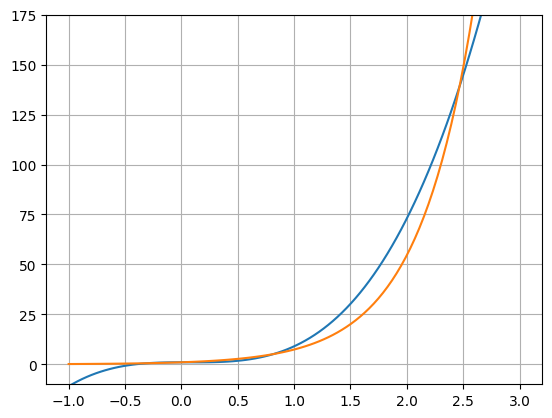

In [4]:
x=np.linspace(-1,3,100)
y1=10*x**3-2*x**2+1
y2=np.exp(2*x)

plt.plot(x,y1)
plt.plot(x,y2)

plt.ylim([-10,175])
plt.grid()

metodo_biseccion(0.5,1,f)


In [5]:
f(2)
f(2.5)
metodo_biseccion(2,2.5,f)
f((metodo_biseccion(2,2.5,f)))
(metodo_biseccion(2,2.5,f))


2.4673563603428192

# Newtwon Raphson

Este método es uno de los más populares para encontrar los ceros de una función, pero
requiere del conocimiento de su derivada. La regla principal del algoritmo consiste
en que, dado un punto $x_k$ cercano a la raíz de $f$, se determina la recta tangente a $f$
en $(x_k, f(x_k))$: <br>

$$y = f(x_k) + f'(x_k)(x - x_k)$$

Luego, se define la iteración siguiente $x_{k+1}$ como el punto de intersección entre esa
recta y el eje $x$, es decir, $x_{k+1}$ se obtiene al despejar

$$0 = f(x_k) + f(x_k)(x_{k+1} - x_k)$$

esto es
$$ x_{k+1} = x_k - \dfrac{f(x_k)}{f'(x_k)}  $$ 

## Algoritmo

Datos de entrada: $x_0, f , tolerancia$

Para $k = 0, 1, 2, ...$

* calcular $x_{k+1} = x_k - \dfrac{f(x_k)}{f'(x_k)}$

Hasta que $| x_{k+1} - x_k | < tolerancia$

## Ejemplo 2:

Elabore una función en Python que permita encontrar una aproximación de una raíz de una función $f:[a,b] \to \mathbb{R}$ usando el método de Newton-Raphson, considerando como datos de entrada un valor cercano a la raíz $x_0$, la función en cuestión $f$, su derivada $f'$ y la tolerancia $t$.

In [6]:
def NR(x0,f,df,t):
    x=[x0]
    while True:
        xn=x[-1]-(f(x[-1])/df(x[-1]))
        x.append(xn)
        if np.abs(x[-1]-x[-2])<t:
            break
    return x[-1]

## Ejercicios:

### 01

La ecuación $\ln(2x) = \dfrac{x}{2}$ tiene dos soluciones. Utilice el método de la bisección con un error máximo de $10^{-8}$ para estimar las soluciones de la ecuación. Justifique su razonamiento para aplicar el método:

   * Formulación de la función a utilizar.
   * Elección de intervalo.
   * Elección de la tolerancia.

### 02*

Encuentre la solución(es) a la ecuación:
$$\dfrac{1}{1-x}=e^x$$
en el intervalo $[-0.5,\, 1]$ mediante el método de bisección, si es posible. En caso contrario, justifique.

### 03

Encontrar utilizando el método de bisección una aproximación de $\sqrt[3]{7}$.

### 04

Una canaleta  de largo $L$ tiene por sección tranversal forma de semicircunferencia de radio $r$ (ambos medidos en cm), como muestra la figura a contianuación:

<table><tr>
<td> <img src="C1.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="C2.png" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

Cuando se llena de agua hasta una distancia $h$ de su parte superior, el volumen $V$ de agua es

$$V=L\left[ \frac{1}{2}\pi r^2 - r^2\arcsin\left(\frac{h}{r} \right) - h\sqrt{r^2-h^2} \right]$$

Suponga que el $L=300 [m]$, $r=30 [cm]$ y el volumen de agua es $V=216 [cm^3]$. Encuentre una aproximación de la altura del agua desde la base de la canaleta.


In [7]:
r=30
L=30000
def g(h): return L*(1/2*np.pi*r**2-r**2*np.arcsin(h/r)-h*np.sqrt(r**2-h**2))-216
#h es altura y se puede considerar en el intervalo de 0 a 30

g(30)



-216.0

In [8]:
g(30)

-216.0

In [9]:
g(0)*g(30)

metodo_biseccion(0,30,g)
g(metodo_biseccion(0,30,g))





2.1915564616392658e-06

In [10]:
#con NR



# Definir los símbolos y las constantes
X = sp.Symbol("x", real=True)  # Utilizar X en lugar de x
L = sp.Symbol("L", real=True, positive=True)
r = sp.Symbol("r", real=True, positive=True)

r=30
L=30000
# Definir la función
F = L * (1/2 * sp.pi * r**2 - r**2 * sp.asin(X / r) - X * sp.sqrt(r**2 - X**2)) - 216

# Calcular la derivada
sp.simplify(sp.diff(F, X))



-60000*sqrt(900 - x**2)

### 05

Encuentre aproximaciones de los ejercicios previos, utilizando el método de Newton-Raphson, justificando su elección de $x_0$.